In [12]:
import numpy as np
import sys
sys.path.append('../')
from masking import collision_detect, box_boundaries_find
import matplotlib.pyplot as plt
from util import masking_array


idx = 0
data = np.load('/home/jh/git/palletizing/rectpack_dataset_generation/dataset_v1/bpp_'+str(idx)+'.npy', allow_pickle=True)

In [13]:
box = data[0]

In [14]:
len(box)

60

In [15]:
packing_log = data[1]

In [16]:
len(packing_log)

28

In [17]:
packing_log[0]['box_position_list']

[[0, 0, 30, 30],
 [30, 0, 34, 22],
 [64, 0, 30, 26],
 [94, 0, 22, 22],
 [116, 0, 30, 30],
 [30, 22, 34, 26],
 [64, 26, 30, 34],
 [94, 30, 34, 26],
 [0, 30, 22, 26],
 [22, 48, 34, 34],
 [94, 56, 26, 30],
 [120, 56, 26, 26],
 [56, 60, 26, 22],
 [120, 82, 26, 34],
 [0, 82, 30, 26],
 [128, 30, 22, 22],
 [30, 82, 34, 26],
 [64, 82, 30, 26],
 [0, 108, 34, 26],
 [94, 86, 26, 30],
 [0, 56, 22, 22],
 [34, 108, 34, 34],
 [68, 108, 22, 34],
 [90, 116, 30, 22]]

In [18]:
packing_log[0].keys()

dict_keys(['algorhithm_name', 'loading_rate', 'bin_size', 'masking_position', 'box_position_list', 'number_of_loaded_box', 'number_of_unloaded_box'])

(0.0, 150.0)

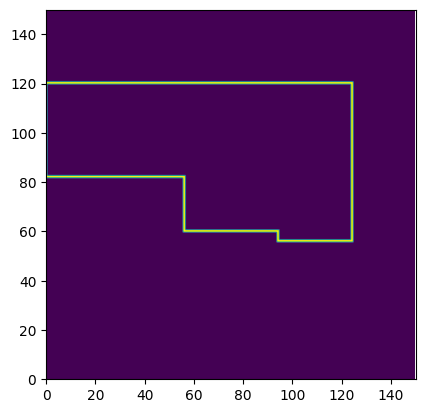

In [19]:
zeros = np.zeros((150,150))


for x,y in packing_log[0]['masking_position'][10]:
    zeros[x,y] = 1

plt.imshow(zeros)
plt.xlim(0,150)
plt.ylim(0,150)

In [20]:
wh = np.array(packing_log[0]['box_position_list'])[:,2:4]

In [21]:
wh[:,0]

array([30, 34, 30, 22, 30, 34, 30, 34, 22, 34, 26, 26, 26, 26, 30, 22, 34,
       30, 34, 26, 22, 34, 22, 30])

In [22]:
torch.ones((150,150))

NameError: name 'torch' is not defined

In [ ]:
wh[:,0].shape

(22,)

In [ ]:
torch.ones((22,1,150,150)).shape

torch.Size([22, 1, 150, 150])

In [ ]:
import torch



array = [collision_detect(packing_log[0]['box_position_list'][:i],150,150) for i in range(len(packing_log[0]['box_position_list']))]
array = torch.Tensor(array).unsqueeze(1).float()

wh = np.array(packing_log[0]['box_position_list'])[:,2:4]

feat1 = torch.tensor(array).unsqueeze(0).unsqueeze(0).float()
feat2 = torch.ones((len(array),1,150,150)).float()*wh[:,0]
feat3 = torch.ones((len(array),1,150,150)).float()*wh[:,1]
# input_array = torch.cat((feat1,feat2,feat3),1).float()



mask = masking_array(packing_log[0]['masking_position'][5],150,150)


# plt.imshow(array, cmap='gray',alpha=0.5)
# plt.imshow(mask, cmap='gray',alpha=0.5)

/tmp/ipykernel_30711/2830520186.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  feat1 = torch.tensor(array).unsqueeze(0).unsqueeze(0).float()


ValueError: operands could not be broadcast together with shapes (22,1,150,150) (22,) 

In [ ]:
from unet import UNet
import torch

mask = [masking_array(m_p,150,150) for m_p in packing_log[0]['masking_position']]
mask = torch.tensor(mask).unsqueeze(1).float()


In [ ]:
array.shape


torch.Size([22, 1, 150, 150])

In [ ]:
print(input_array.shape)

torch.Size([1, 3, 150, 150])


In [ ]:
mask.shape

torch.Size([22, 1, 150, 150])

In [ ]:

model = UNet(3, 1)
test_output = model(input_array,mask)
test_output = test_output.squeeze(0).squeeze(0).detach().numpy()

TypeError: Invalid shape (22, 1, 150, 150) for image data

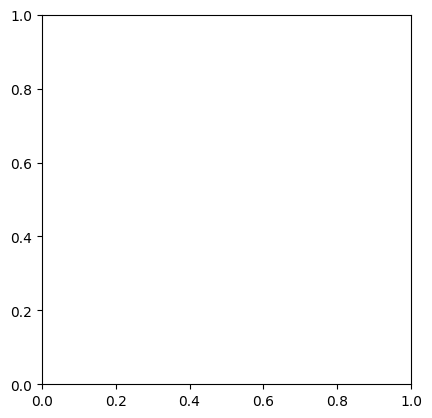

In [ ]:
plt.imshow(test_output)